In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
facilities_df = pd.read_csv(r'C:\Users\user\Desktop\shadow net\data analysis\Healthcare Access Inequality in Kenya\healthcare_facilities.csv')

population_df = pd.read_csv(r'C:\Users\user\Desktop\shadow net\data analysis\Healthcare Access Inequality in Kenya\population_data.csv')

In [3]:
facilities_df.head()

Code                                  Name  \
0  25720                      Itete Dispensary   
1  25722  Penda Medical Center - Mathare North   
2   None                            Mukavakava   
3   None                    Nchurra Dispensary   
4   None             Upland Health Care Center   

                           Officialname Registration_number Keph level  \
0                      Itete Dispensary               01245    Level 2   
1  Penda Medical Center - Mathare North              017345    Level 3   
2                            Mukavakava                None    Level 2   
3                    Nchurra Dispensary                None    Level 2   
4             Upland Health Care Center                None    Level 2   

    Facility type Facility_type_category  \
0      Dispensary             DISPENSARY   
1  Medical Center         MEDICAL CENTER   
2      Dispensary             DISPENSARY   
3      Dispensary             DISPENSARY   
4  Medical Clinic         MEDICAL CLINIC   

                                  Owner          Owner type  \
0                    Ministry of Health  Ministry of Health   
1    Private Practice - Private Company    Private Practice   
2                    Ministry of Health  Ministry of Health   
3                    Ministry of Health  Ministry of Health   
4  Private Practice - Nurse / Midwifery    Private Practice   

      Regulatory body  ...            Ward  Operation status  Open_whole_day  \
0  Ministry of Health  ...         Koyonzo       Operational              No   
1          Kenya MPDB  ...   Mathare North       Operational              No   
2  Ministry of Health  ...  Butali/Chegulo       Operational              No   
3  Ministry of Health  ...          Melelo       Operational              No   
4                None  ...        Kerugoya       Operational              No   

  Open_public_holidays Open_weekends Open_late_night Service_names Approved  \
0                   No            No              No           NaN      Yes   
1                  Yes           Yes              No           NaN      Yes   
2                   No            No              No           NaN      Yes   
3                   No            No              No           NaN      Yes   
4                  Yes           Yes             Yes           NaN      Yes   

  Public visible Closed  
0            Yes     No  
1            Yes     No  
2            Yes     No  
3            Yes     No  
4            Yes     No  

[5 rows x 26 columns]

In [4]:
facilities_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12394 entries, 0 to 12393
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code                    12394 non-null  object 
 1   Name                    12394 non-null  object 
 2   Officialname            12394 non-null  object 
 3   Registration_number     12343 non-null  object 
 4   Keph level              12394 non-null  object 
 5   Facility type           12394 non-null  object 
 6   Facility_type_category  12394 non-null  object 
 7   Owner                   12394 non-null  object 
 8   Owner type              12394 non-null  object 
 9   Regulatory body         12394 non-null  object 
 10  Beds                    12394 non-null  object 
 11  Cots                    12394 non-null  int64  
 12  Beds and Cots           12394 non-null  int64  
 13  County                  12394 non-null  object 
 14  Constituency            12394 non-null

In [5]:
population_df.head()

County  Total_Population19  Male populatio 2019  \
0          Baringo              666763               336322   
1            Bomet              875689               434287   
2          Bungoma             1670570               812146   
3            Busia              893681               426252   
4  Elgeyo-Marakwet              454480               227317   

   Female population 2019  Households  Av_HH_Size  LandArea  \
0                  330428      142518           5     10976   
1                  441379      187641           5      2531   
2                  858389      358796           5      3024   
3                  467401      198152           5      1696   
4                  227151       99861           5      3032   

   Population Density  Population in 2009  Pop_change  \
0                  61              555561      111202   
1                 346              724186      151503   
2                 552             1630934       39636   
3                 527              488075      405606   
4                 150              369998       84482   

   Intersex population 2019  
0                        13  
1                        23  
2                        35  
3                        28  
4                        12

In [6]:
population_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   County                    47 non-null     object
 1   Total_Population19        47 non-null     int64 
 2   Male populatio 2019       47 non-null     int64 
 3   Female population 2019    47 non-null     int64 
 4   Households                47 non-null     int64 
 5   Av_HH_Size                47 non-null     int64 
 6   LandArea                  47 non-null     int64 
 7   Population Density        47 non-null     int64 
 8   Population in 2009        47 non-null     int64 
 9   Pop_change                47 non-null     int64 
 10  Intersex population 2019  47 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 4.2+ KB


In [7]:
facilities_df['County'] = facilities_df['County'].str.strip().str.title()
population_df['County'] = population_df['County'].str.strip().str.title()

In [8]:
print(sorted(facilities_df['County'].unique()))
print(sorted(population_df['County'].unique()))

['Baringo', 'Bomet', 'Bungoma', 'Busia', 'Elgeyo Marakwet', 'Embu', 'Garissa', 'Homa Bay', 'Isiolo', 'Kajiado', 'Kakamega', 'Kericho', 'Kiambu', 'Kilifi', 'Kirinyaga', 'Kisii', 'Kisumu', 'Kitui', 'Kwale', 'Laikipia', 'Lamu', 'Machakos', 'Makueni', 'Mandera', 'Marsabit', 'Meru', 'Migori', 'Mombasa', 'Muranga', 'Nairobi', 'Nakuru', 'Nandi', 'Narok', 'Nyamira', 'Nyandarua', 'Nyeri', 'Samburu', 'Siaya', 'Taita Taveta', 'Tana River', 'Tharaka Nithi', 'Trans Nzoia', 'Turkana', 'Uasin Gishu', 'Vihiga', 'Wajir', 'West Pokot']
['Baringo', 'Bomet', 'Bungoma', 'Busia', 'Elgeyo-Marakwet', 'Embu', 'Garissa', 'Homa Bay', 'Isiolo', 'Kajiado', 'Kakamega', 'Kericho', 'Kiambu', 'Kilifi', 'Kirinyaga', 'Kisii', 'Kisumu', 'Kitui', 'Kwale', 'Laikipia', 'Lamu', 'Machakos', 'Makueni', 'Mandera', 'Marsabit', 'Meru', 'Migori', 'Mombasa', "Murang'A", 'Nairobi', 'Nakuru', 'Nandi', 'Narok', 'Nyamira', 'Nyandarua', 'Nyeri', 'Samburu', 'Siaya', 'Taita Taveta', 'Tana River', 'Tharaka-Nithi', 'Trans Nzoia', 'Turkana',

In [9]:
facilities_df['County'] = facilities_df['County'].str.replace("Muranga", "Murang'a")

In [10]:
population_df['County'] = population_df['County'].str.replace("Murang'A", "Murang'a")
population_df['County'] = population_df['County'].str.replace("Elgeyo-Marakwet", "Elgeyo Marakwet")
population_df['County'] = population_df['County'].str.replace("Tharaka-Nithi", "Tharaka Nithi")


In [11]:
sorted(population_df['County'].unique())

['Baringo',
 'Bomet',
 'Bungoma',
 'Busia',
 'Elgeyo Marakwet',
 'Embu',
 'Garissa',
 'Homa Bay',
 'Isiolo',
 'Kajiado',
 'Kakamega',
 'Kericho',
 'Kiambu',
 'Kilifi',
 'Kirinyaga',
 'Kisii',
 'Kisumu',
 'Kitui',
 'Kwale',
 'Laikipia',
 'Lamu',
 'Machakos',
 'Makueni',
 'Mandera',
 'Marsabit',
 'Meru',
 'Migori',
 'Mombasa',
 "Murang'a",
 'Nairobi',
 'Nakuru',
 'Nandi',
 'Narok',
 'Nyamira',
 'Nyandarua',
 'Nyeri',
 'Samburu',
 'Siaya',
 'Taita Taveta',
 'Tana River',
 'Tharaka Nithi',
 'Trans Nzoia',
 'Turkana',
 'Uasin Gishu',
 'Vihiga',
 'Wajir',
 'West Pokot']

In [12]:
print(sorted(facilities_df['County'].unique()))
print(sorted(population_df['County'].unique()))

['Baringo', 'Bomet', 'Bungoma', 'Busia', 'Elgeyo Marakwet', 'Embu', 'Garissa', 'Homa Bay', 'Isiolo', 'Kajiado', 'Kakamega', 'Kericho', 'Kiambu', 'Kilifi', 'Kirinyaga', 'Kisii', 'Kisumu', 'Kitui', 'Kwale', 'Laikipia', 'Lamu', 'Machakos', 'Makueni', 'Mandera', 'Marsabit', 'Meru', 'Migori', 'Mombasa', "Murang'a", 'Nairobi', 'Nakuru', 'Nandi', 'Narok', 'Nyamira', 'Nyandarua', 'Nyeri', 'Samburu', 'Siaya', 'Taita Taveta', 'Tana River', 'Tharaka Nithi', 'Trans Nzoia', 'Turkana', 'Uasin Gishu', 'Vihiga', 'Wajir', 'West Pokot']
['Baringo', 'Bomet', 'Bungoma', 'Busia', 'Elgeyo Marakwet', 'Embu', 'Garissa', 'Homa Bay', 'Isiolo', 'Kajiado', 'Kakamega', 'Kericho', 'Kiambu', 'Kilifi', 'Kirinyaga', 'Kisii', 'Kisumu', 'Kitui', 'Kwale', 'Laikipia', 'Lamu', 'Machakos', 'Makueni', 'Mandera', 'Marsabit', 'Meru', 'Migori', 'Mombasa', "Murang'a", 'Nairobi', 'Nakuru', 'Nandi', 'Narok', 'Nyamira', 'Nyandarua', 'Nyeri', 'Samburu', 'Siaya', 'Taita Taveta', 'Tana River', 'Tharaka Nithi', 'Trans Nzoia', 'Turkana'

In [13]:
facilities_df.isnull().sum().sort_values(ascending = False)

Service_names             12394
Registration_number          51
Code                          0
Constituency                  0
Public visible                0
Approved                      0
Open_late_night               0
Open_weekends                 0
Open_public_holidays          0
Open_whole_day                0
Operation status              0
Ward                          0
Sub county                    0
County                        0
Name                          0
Beds and Cots                 0
Cots                          0
Beds                          0
Regulatory body               0
Owner type                    0
Owner                         0
Facility_type_category        0
Facility type                 0
Keph level                    0
Officialname                  0
Closed                        0
dtype: int64

In [14]:
population_df.isnull().sum().sort_values(ascending = False)

County                      0
Total_Population19          0
Male populatio 2019         0
Female population 2019      0
Households                  0
Av_HH_Size                  0
LandArea                    0
Population Density          0
Population in 2009          0
Pop_change                  0
Intersex population 2019    0
dtype: int64

In [15]:
facilities_by_county = facilities_df.groupby('County').size().reset_index(name='Facility_Count')
facilities_by_county

County  Facility_Count
0           Baringo             251
1             Bomet             188
2           Bungoma             244
3             Busia             157
4   Elgeyo Marakwet             134
5              Embu             218
6           Garissa             184
7          Homa Bay             328
8            Isiolo              69
9           Kajiado             346
10         Kakamega             332
11          Kericho             234
12           Kiambu             666
13           Kilifi             348
14        Kirinyaga             264
15            Kisii             230
16           Kisumu             289
17            Kitui             446
18            Kwale             175
19         Laikipia             202
20             Lamu              56
21         Machakos             410
22          Makueni             343
23          Mandera             152
24         Marsabit             123
25             Meru             529
26           Migori             290
27          Mombasa             308
28         Murang'a             333
29          Nairobi            1005
30           Nakuru             562
31            Nandi             232
32            Narok             197
33          Nyamira             173
34        Nyandarua             167
35            Nyeri             423
36          Samburu             109
37            Siaya             242
38     Taita Taveta             106
39       Tana River              80
40    Tharaka Nithi             164
41      Trans Nzoia             181
42          Turkana             256
43      Uasin Gishu             240
44           Vihiga             115
45            Wajir             140
46       West Pokot             153

In [16]:
merged_df = pd.merge(population_df, facilities_by_county, on='County', how='inner')

In [17]:
merged_df.head()

County  Total_Population19  Male populatio 2019  \
0          Baringo              666763               336322   
1            Bomet              875689               434287   
2          Bungoma             1670570               812146   
3            Busia              893681               426252   
4  Elgeyo Marakwet              454480               227317   

   Female population 2019  Households  Av_HH_Size  LandArea  \
0                  330428      142518           5     10976   
1                  441379      187641           5      2531   
2                  858389      358796           5      3024   
3                  467401      198152           5      1696   
4                  227151       99861           5      3032   

   Population Density  Population in 2009  Pop_change  \
0                  61              555561      111202   
1                 346              724186      151503   
2                 552             1630934       39636   
3                 527              488075      405606   
4                 150              369998       84482   

   Intersex population 2019  Facility_Count  
0                        13             251  
1                        23             188  
2                        35             244  
3                        28             157  
4                        12             134

In [18]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 0 to 46
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   County                    47 non-null     object
 1   Total_Population19        47 non-null     int64 
 2   Male populatio 2019       47 non-null     int64 
 3   Female population 2019    47 non-null     int64 
 4   Households                47 non-null     int64 
 5   Av_HH_Size                47 non-null     int64 
 6   LandArea                  47 non-null     int64 
 7   Population Density        47 non-null     int64 
 8   Population in 2009        47 non-null     int64 
 9   Pop_change                47 non-null     int64 
 10  Intersex population 2019  47 non-null     int64 
 11  Facility_Count            47 non-null     int64 
dtypes: int64(11), object(1)
memory usage: 4.8+ KB


In [19]:
merged_df['Population_per_Facility'] = merged_df['Total_Population19'] / merged_df['Facility_Count']

In [20]:
merged_df['Population_per_Facility'].describe()

count      47.000000
mean     3932.689136
std      1120.199756
min      1794.713948
25%      3193.485226
50%      3847.334520
75%      4615.245432
max      6846.598361
Name: Population_per_Facility, dtype: float64

In [21]:
merged_df.sort_values(by = 'Population_per_Facility', ascending = False).head(10)

County  Total_Population19  Male populatio 2019  \
2       Bungoma             1670570               812146   
32        Narok             1157873               579042   
23      Mandera              867457               434976   
3         Busia              893681               426252   
10     Kakamega             1867579               897133   
45        Wajir              781263               415374   
15        Kisii             1266860               605784   
41  Trans Nzoia              990341               489107   
44       Vihiga              590013               283678   
18        Kwale              866820               425121   

    Female population 2019  Households  Av_HH_Size  LandArea  \
2                   858389      358796           5      3024   
32                  578805      241125           5     17950   
23                  432444      125763           7     25940   
3                   467401      198152           5      1696   
10                  970406      433207           4      3020   
45                  365840      127932           6     56773   
15                  661038      308054           4      1323   
41                  501206      223808           4      2495   
44                  306323      143365           4       564   
18                  441681      173176           5      8267   

    Population Density  Population in 2009  Pop_change  \
2                  552             1630934       39636   
32                  65              850920      306953   
23                  33             1025756     -158299   
3                  527              488075      405606   
10                 618             1660651      206928   
45                  14              661941      119322   
15                 958             1152282      114578   
41                 397              818757      171584   
44                1047              554622       35391   
18                 105              649931      216889   

    Intersex population 2019  Facility_Count  Population_per_Facility  
2                         35             244              6846.598361  
32                        26             197              5877.527919  
23                        37             152              5706.953947  
3                         28             157              5692.235669  
10                        40             332              5625.237952  
45                        49             140              5580.450000  
15                        38             230              5508.086957  
41                        28             181              5471.497238  
44                        12             115              5130.547826  
18                        18             175              4953.257143

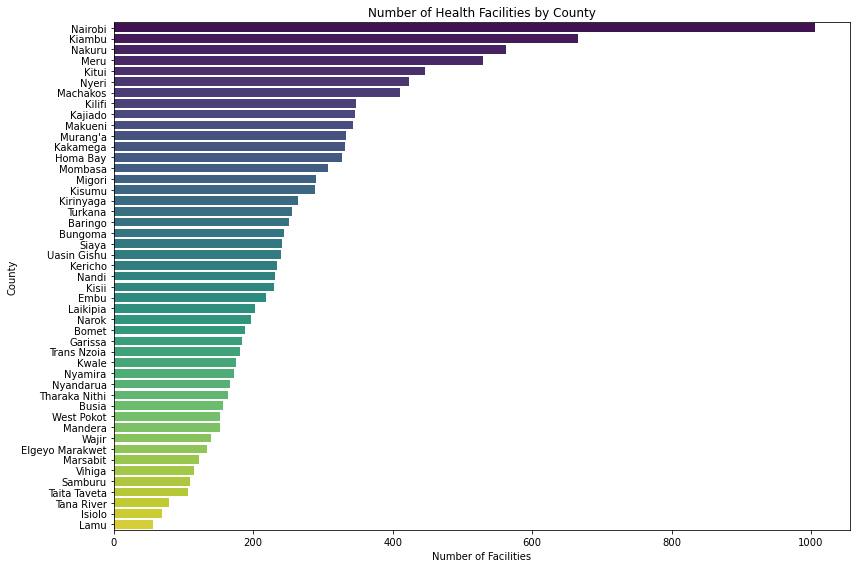

In [22]:
plt.figure(figsize=(12, 8))
sns.barplot(data = merged_df.sort_values(by = 'Facility_Count', ascending = False),
            x = 'Facility_Count', y = 'County', palette = 'viridis')
plt.title('Number of Health Facilities by County')
plt.xlabel('Number of Facilities')
plt.ylabel('County')
plt.tight_layout()
plt.show()

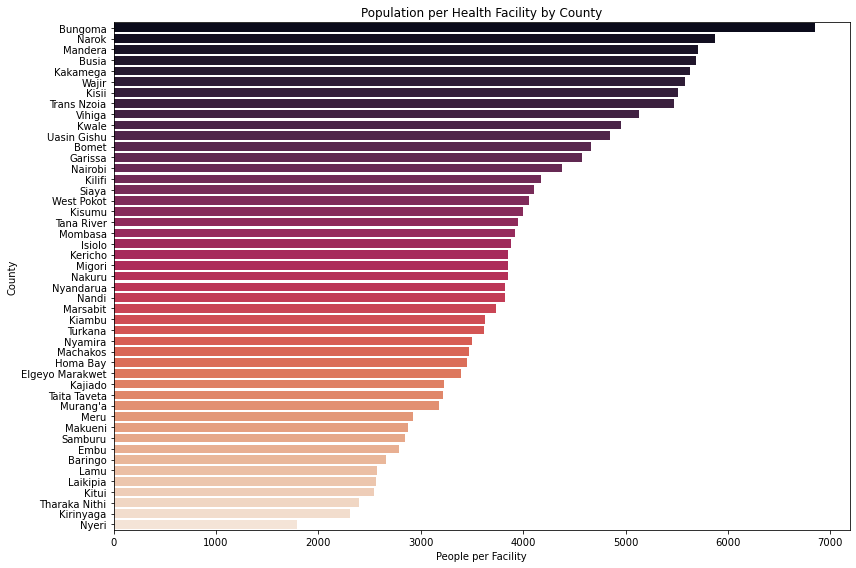

In [23]:
plt.figure(figsize=(12, 8))
sns.barplot(data = merged_df.sort_values(by = 'Population_per_Facility', ascending = False),
            x = 'Population_per_Facility', y = 'County', palette = 'rocket')
plt.title('Population per Health Facility by County')
plt.xlabel('People per Facility')
plt.ylabel('County')
plt.tight_layout()
plt.show()

In [24]:
threshold = merged_df['Population_per_Facility'].median()
merged_df['Underserved'] = merged_df['Population_per_Facility'] > threshold

underserved_counties = merged_df[merged_df['Underserved'] == True][['County', 'Population_per_Facility']]

In [25]:
underserved_counties

County  Population_per_Facility
1         Bomet              4657.920213
2       Bungoma              6846.598361
3         Busia              5692.235669
6       Garissa              4572.570652
8        Isiolo              3884.086957
10     Kakamega              5625.237952
11      Kericho              3853.747863
13       Kilifi              4177.548851
15        Kisii              5508.086957
16       Kisumu              3998.525952
18        Kwale              4953.257143
23      Mandera              5706.953947
26       Migori              3849.779310
27      Mombasa              3923.159091
29      Nairobi              4375.197015
32        Narok              5877.527919
37        Siaya              4104.061983
39   Tana River              3949.287500
41  Trans Nzoia              5471.497238
43  Uasin Gishu              4846.608333
44       Vihiga              5130.547826
45        Wajir              5580.450000
46   West Pokot              4060.398693

In [26]:
# County clustering

def label_access(row):
    if row['Population_per_Facility'] < 3000:
        return 'Good Access'
    elif row['Population_per_Facility'] < 4000:
        return 'Moderate Access'
    else:
        return 'Poor Access'

merged_df['Access_Level'] = merged_df.apply(label_access, axis=1)


In [27]:
merged_df['Access_Rank'] = merged_df['Population_per_Facility'].rank(ascending=True)

In [29]:
merged_df.to_csv('health_access_analysis.csv', index=False)